# **1. Введение в k Nearest Neighbours algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)




# **2. Интуиция k Nearest Neighbours** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

Интуиция алгоритма kNN очень проста для понимания. Он просто вычисляет расстояние между точкой выборки данных и всеми другими точками обучающих данных. Расстояние может быть евклидовым или манхэттенским. Затем он выбирает k ближайших точек данных, где k может быть любым целым числом. Наконец, он присваивает выбранную точку данных классу, к которому принадлежит большинство k точек данных.


Теперь мы увидим алгоритм kNN в действии. Предположим, у нас есть набор данных с двумя признаками, которые классифицируются как «Красный» и «Синий».


В алгоритме kNN k — это количество ближайших соседей. Как правило, k — нечетное число, потому что оно помогает определить большую часть класса. Когда k=1, алгоритм называется алгоритмом ближайшего соседа.

Теперь мы хотим классифицировать новую точку данных «X» в класс «Синий» или «Красный». Предположим, что значение k равно 3. Алгоритм kNN начинается с вычисления расстояния между «X» и всеми другими точками данных. Затем он находит 3 ближайшие точки с наименьшим расстоянием до точки «X».


На последнем этапе алгоритма kNN мы назначаем новую точку данных «X» большинству класса из 3 ближайших точек. Если 2 из 3 ближайших точек принадлежат классу «Красный», а 1 принадлежит классу «Синий», то мы классифицируем новую точку данных как «Красную».


![](https://i.ibb.co/QnQSt5h/2021-12-04-22-09-15.png)

k ближайших соседей - очень хорошо изученный алгоритм, он даже теоретически идеален: если у нас есть бесконечный датасет для обучения, то с помщоью knn мы можем восстановить полностью всю зависимость. На самом деле, бесконечный датасет даже и не нужен. Нам нужно просто иметь около каждой точкт пространства достатоно много примеров, чтобы мы хорошо могли оценить вероятность каждого из классов.

Самая большая проблема knn - проклятие размерности. Когда у нас становится много признаков, плотность обучающих примеров в n-мерном пространстве резко снижается.

Рассмотрим единичный интервал [0,1]. 100 равномерно разбросанных точек будет достаточно, чтобы покрыть этот интервал с частотой не менее 0,01.

Теперь рассмотрим 10-мерный куб. Для достижения той же степени покрытия потребуется уже 10**20 точек. То есть, по сравнению с одномерным пространством, требуется в 10**18 раз больше точек.

Поэтому, например, использование переборных алгоритмов становится неэффективным при возрастании размерности системы.

![](https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png)

С увеличением размерности, все больше объектов обучающей выборки находятся в "углах" пространства признаков.

![](https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png)

Отсюда вытекают сильные и слабые стороны KNN

**Плюсы:**

- Хороший бейзлайн.
- Хорошая интерпретируемость при небольом числе признаков.
- Быстрый на небольших и средних данных.
- Теоретически идеален и не делает никаких предположений о зависимости

**Минусы:**

- Нужно хорошее пространство и метрика, чтобы он работал. Т.е. нужно отбирать признаки, уменьшать размерность данных, стандартизировать признаки итд.
- Если можно сделать какие-то предположения о природе данных, их нужно встраивать в модель через создание новых признаков или измение метрики. Очень сложно и требует опыта.

# **3. Как определить количество соседей в kNN** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


При построении модели классификатора kNN мне в голову приходит один вопрос: каким должно быть значение ближайших соседей (k), обеспечивающее максимальную точность. Это очень важный вопрос, поскольку точность классификации зависит от нашего выбора k.

Количество соседей (k) в kNN — это параметр, который нам нужно выбрать во время построения модели. Выбор оптимального значения k в kNN является наиболее важной проблемой. Небольшое значение k означает, что шум будет иметь большее влияние на результат. Таким образом, вероятность переобучения очень высока. Большое значение k делает вычислительно затратным с точки зрения времени построение модели kNN. Кроме того, большое значение k будет иметь более гладкую границу решения, что означает более низкую дисперсию, но более высокое смещение.

Исследователи данных выбирают нечетное значение k, если количество классов четное. Мы можем применить метод локтя, чтобы выбрать значение k. Чтобы оптимизировать результаты, мы можем использовать метод перекрестной проверки. Используя метод перекрестной проверки, мы можем протестировать алгоритм kNN с разными значениями k. Модель, дающая хорошую точность, можно считать оптимальным выбором. Это зависит от отдельных случаев, и иногда лучший процесс — это перебрать все возможные значения k и проверить наш результат.

# **4. Жадное обучение против ленивого** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

В искусственном интеллекте жадное обучение — это метод обучения, при котором система пытается построить общую, независимую от ввода целевую функцию во время обучения системы, в отличие от ленивого обучения, когда обобщение за пределами обучающих данных откладывается до тех пор, пока не будет сделан запрос к системе.

Жадное обучение подразумевает, что при предоставлении точек данных для обучения мы построим обобщенную модель, прежде чем выполнять прогнозирование по заданным новым точкам для классификации. Мы можем думать о таком обучении как об активном и стремящимся классифицировать новые точки данных.

Ленивое обучение означает, что нет необходимости в обучении или обучении модели, и все точки данных используются во время прогнозирования. Ленивое обучение ждет до последней минуты, прежде чем классифицировать любую точку данных. Оно просто сохраняет обучающий набор данных и ждет, пока не потребуется выполнить классификацию. Ленивое обучение также известно как обучение на основе примеров, потому что ленивое обучение хранит тренировочные точки или примеры, а все обучение основано на примерах.

В отличие от жадного обучения, ленивые обучение меньше работают на этапе обучения и больше работают на этапе тестирования, чтобы провести классификацию.

# **5. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [3]:
data = 'breast-cancer-wisconsin.data.txt'

df = pd.read_csv(data, header=None)

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


Давайте изучим данные

In [4]:

df.shape

(699, 11)

Мы видим, что в наборе данных 699 экземпляров и 11 атрибутов.


В описании набора данных указано, что существует 10 признаков и 1 «класс», который является целевой переменной. Итак, у нас есть 10 признаков и 1 целевая переменная.

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Переименовать имена столбцов

Мы видим, что в наборе данных нет правильных имен столбцов. Столбцы просто помечены как 0,1,2.... и так далее. Мы должны дать правильные имена столбцам. Я сделаю это следующим образом: 

In [6]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Мы видим, что имена столбцов переименованы. Теперь столбцы имеют осмысленные названия.

In [7]:
# let's agian preview the dataset

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Удалить лишние столбцы


Мы должны удалить все избыточные столбцы из набора данных, которые не имеют никакой предсказательной силы. Здесь «Id» является лишним столбцом. Итак, я удалю его первым.

In [8]:
# drop Id column from dataset

df.drop('Id', axis=1, inplace=True)

### Просмотр сводки набора данных


In [9]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Мы видим, что столбец «Id» был удален из набора данных.

Мы видим, что в наборе данных есть 9 числовых признаков и 1 категориальная переменная. Я проверю частотное распределение значений в признаках, чтобы убедиться в этом.

### Частотное распределение значений в признаках

In [10]:
for var in df.columns:
    
    print(df[var].value_counts())


1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

Распределение значений показывает, что тип данных `Bare_Nuclei` имеет целочисленный тип. Но саммари датасета показывает, что это тип объекта. Итак, я буду  преобразовывать его тип данных в целочисленный.

### Конвертируем тип данных  Bare_Nuclei в integer

In [11]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

### Проверка типов данных в датафрейме

In [12]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Теперь мы видим, что все столбцы фрейма данных имеют числовой тип.

### Сводка признаков


- В наборе данных 10 числовых признаков.


- Все признаки дискретного типа.


### Исследование проблем в признаках


Теперь я буду исследовать проблемы внутри признаков.

### Отсутствующие значения

In [13]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Мы видим, что столбец `Bare_Nuclei` содержит пропущенные значения. Нам нужно копнуть глубже, чтобы найти частотное распределение значения `Bare_Nuclei`.

In [14]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Мы видим, что столбец `Bare_Nuclei` содержит 16 значений «nan».

In [15]:
# проверить частотное распределение столбца `Bare_Nuclei`

df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [16]:
# проверить уникальные значения в столбце `Bare_Nuclei`

df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

Мы видим, что в столбце Bare_Nuclei есть значения nan.

In [17]:
# проверить значения nan в столбце «Bare_Nuclei»

df['Bare_Nuclei'].isna().sum()

16

Мы видим, что в наборе данных есть 16 значений nan. Я заменю пропущенные значения после разделения набора данных на обучающий и тестовый наборы.

### Проверка частотного распределения целевой переменной `Class`

In [18]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Соотношение в процентах `Class`

In [19]:
df['Class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

Мы видим, что переменная `Class` содержит 2 метки класса – `2` и `4`. «2» означает доброкачественный рак, а «4» — злокачественный рак.

### Выбросы в числовых признаках

In [20]:

print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

Алгоритм kNN устойчив к выбросам.

# **8. Визуализация данных** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Теперь у нас есть общее представление о наших данных. Я дополню его некоторой визуализацией, чтобы лучше понять
наши данные.

### Одномерные графики

### Распределение признаков


Теперь я построю гистограммы, чтобы проверить распределения признаков, чтобы выяснить, являются ли они нормальными или асимметричными.

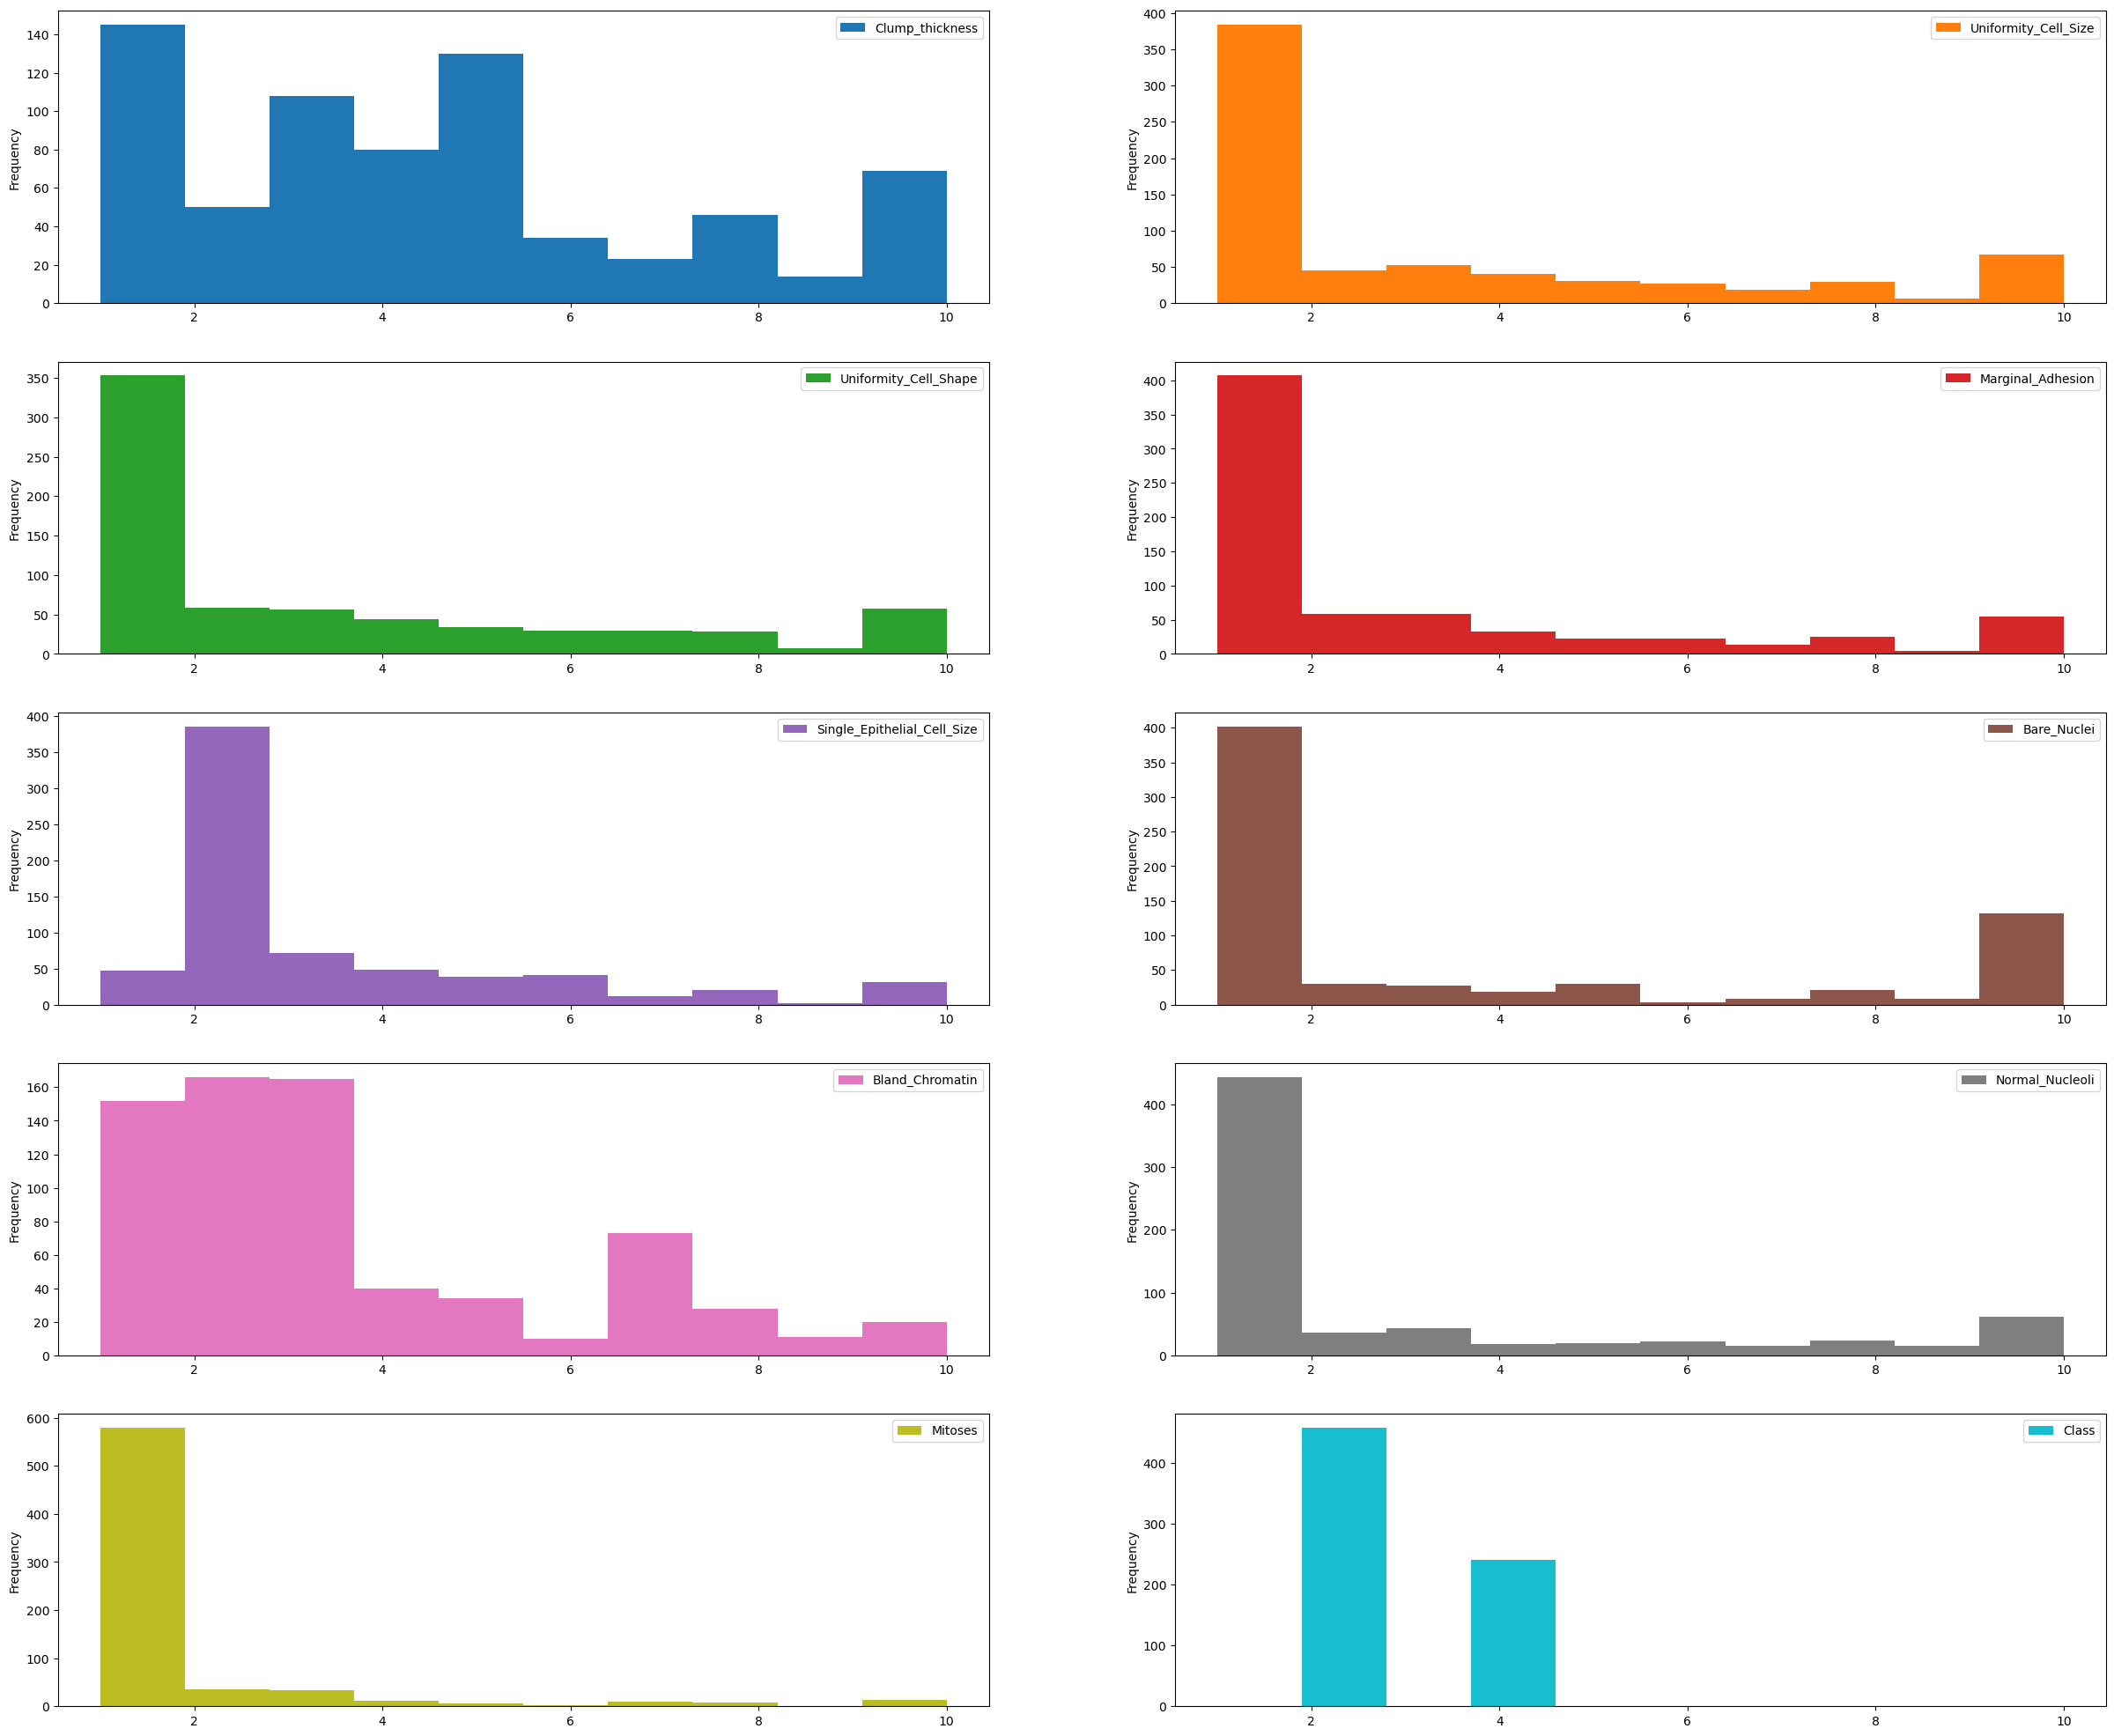

In [21]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

Мы видим, что все признаки в наборе данных имеют положительную асимметрию.

### Многомерные графики

### Оценка коэффициентов корреляции

Наш набор данных очень мал. Итак, мы можем вычислить стандартный коэффициент корреляции (также называемый коэффицент Пирсона) между каждой парой атрибутов. Мы можем вычислить его с помощью метода `df.corr()` следующим образом:

In [22]:
correlation = df.corr()

Наша целевая переменная — `Class`. Итак, мы должны проверить, как каждый атрибут соотносится с переменной `Class`. Мы можем сделать это следующим образом: 

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

### Интерпретация

- Коэффициент корреляции колеблется от -1 до +1.

- Когда он близок к +1, это означает наличие сильной положительной корреляции. Итак, мы видим, что существует сильная положительная корреляция между `Class` и `Bare_Nuclei`, `Class` и `Uniformity_Cell_Shape`, `Class` и `Uniformity_Cell_Size`.

- Когда он близок к -1, это означает, что существует сильная отрицательная корреляция. Когда он близок к 0, это означает, что корреляции нет.

- Мы видим, что все признаки положительно коррелируют с переменной «Класс». Некоторые переменные имеют сильную положительную корреляцию, в то время как некоторые переменные имеют отрицательную корреляцию.


### Закономерности и взаимосвязи

Важным шагом в EDA является обнаружение закономерностей и взаимосвязей между признаками в наборе данных. Я буду использовать тепловую карту Seaborn для изучения закономерностей и взаимосвязей в наборе данных.

### Корреляционная Heat Map

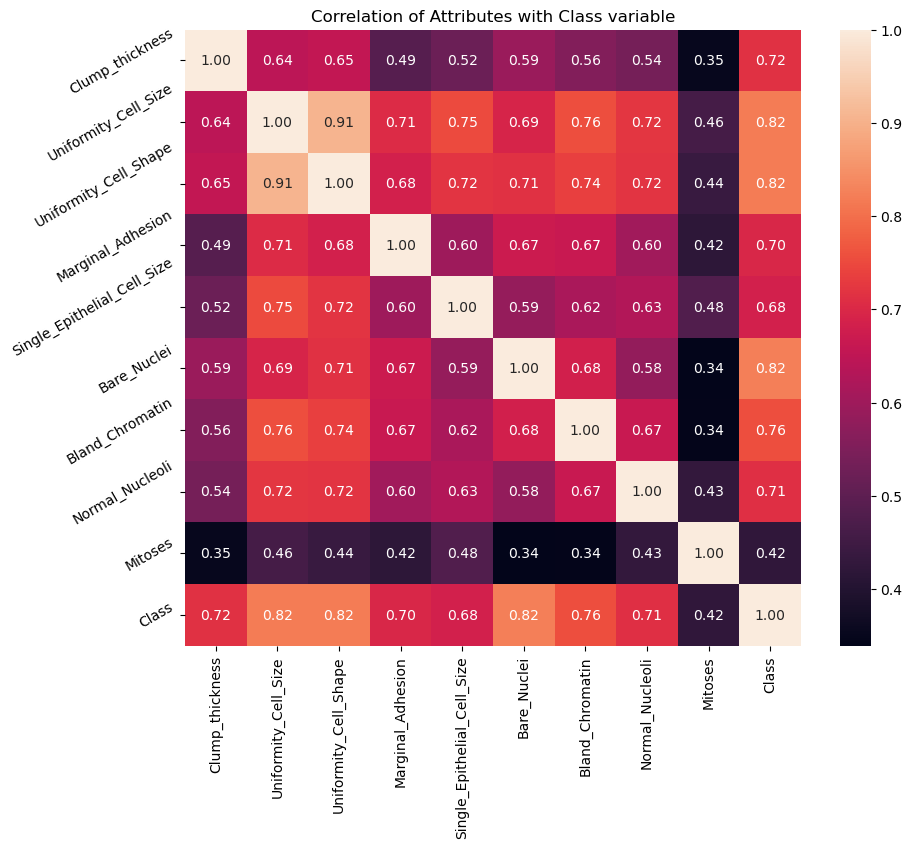

In [24]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Интерпретация


Из приведенной выше тепловой карты корреляции мы можем сделать вывод, что:

1. `Class` имеет высокую положительную корреляцию с `Uniformity_Cell_Size`, `Uniformity_Cell_Shape` и `Bare_Nuclei`. (коэффициент корреляции = 0,82).

2. `Class` положительно коррелирует с `Clump_thickness` (коэффициент корреляции = 0,72), `Marginal_Adhesion` (коэффициент корреляции = 0,70), `Single_Epithelial_Cell_Size` (коэффициент корреляции = 0,68) и  `Normal_Nucleoli` (коэффициент корреляции = 0,71).

3. `Class` слабо коррелирует с `Mitoses` (коэффициент корреляции = 0,42).

4. Признак `Mitoses` слабо положительно коррелирует со всеми другими признаками (коэффициент корреляции <0,50).



# **9. Создание векторов признаков и целевой переменную** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [25]:
X = df.drop(['Class'], axis=1)

y = df['Class']

# **10. Разделить данные на отдельные наборы для обучения и тестирования** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [27]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

# **11. Feature Engineering** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)


In [28]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

### Пропущенные значения в признаках



In [29]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [30]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [31]:
# процент пропущенных значений в числовых признаках в обучающем наборе

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


### Предположение


Я предполагаю, что данные отсутствуют совершенно случайно. Когда в наборе данных есть выбросы, мы должны использовать медианную замену. Итак, я буду использовать медианную замену, потому что медианная замена устойчива к выбросам.


Я заменю пропущенные значения соответствующими статистическими показателями данных, в данном случае медианой. Замена должна выполняться по обучающему набору, а затем распространяться на тестовый набор. Это означает, что статистические меры, которые будут использоваться для заполнения пропущенных значений как в обучающем наборе, так и в тестовом наборе, должны быть извлечены только из набора для обучения. Это нужно для того, чтобы избежать переобучения.

In [32]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [33]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

Мы видим, что в X_train и X_test нет пропущенных значений.

In [35]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [36]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4



Теперь у нас есть набор для обучения и тестирования, готовый для построения модели. Перед этим мы должны сопоставить все  признаки в одном масштабе. Это называется `feature scaling` или масштабирование признаков. Я сделаю это следующим образом.

# **12. Feature Scaling** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

Нормирование признаков

Вообще, нормировать признаки стоит почти всегда. Это очень важно для
- Метрических алогритмов
- Линейных алогритмов (мы еще узнаем, что признаки хорошо не только отнормировать, но и как можно сильнее приблизить их распределение к нормальному). Сюда относятся как всевозможные регрессии, так и PCA, который мы используем ниже.

Нормировка не важна разве что для алгоритмов, основанных на решающих деревьях.

In [37]:
cols = X_train.columns

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [40]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [41]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


Теперь у нас есть набор данных `X_train`, готовый для загрузки в классификатор логистической регрессии. Я сделаю это следующим образом.

# **13. Fit K Neighbours Classifier к набору для обучения** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# **14. Predict на тесте** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [43]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

### predict_proba метод


**predict_proba** метод дает вероятности для целевой переменной (2 и 4) в этом случае в форме массива.


In [44]:
# вероятность 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [45]:
# вероятность 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

# **15. Accuracy score** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


Здесь **y_test** — истинные метки классов, а **y_pred** — предсказанные метки классов в тестовом наборе.

### Сравнение точности обучающей выборки  и тестовой

Теперь сравним точность на train и test чтобы понять не переобучились ли мы

In [47]:
y_pred_train = knn.predict(X_train)

In [48]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


### Проверка на переобучение и недообучение

In [49]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


Оценка точности обучающего набора составляет 0,9821, а точность тестового набора - 0,9714. Эти два значения вполне сопоставимы. Так что о переобучении речи не идет.

### Сравните точность модели с нулевой точностью


Итак, точность модели составляет 0,9714. Но мы не можем сказать, что наша модель очень хороша, исходя из указанной выше точности. Мы должны сравнить это с **нулевой точностью**. Нулевая точность — это точность, которой можно достичь, всегда предсказывая наиболее часто встречающийся класс.

Итак, мы должны сначала проверить распределение классов в тестовом наборе.


In [50]:
# check class distribution in test set

y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

Мы видим, что вхождение наиболее частого класса равно 85. Таким образом, мы можем вычислить нулевую точность, разделив 85 на общее количество вхождений.

In [51]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


Мы видим, что показатель точности нашей модели равен 0,9714, а нулевой показатель точности равен 0,6071. Итак, мы можем сделать вывод, что наша модель K ближайших соседей очень хорошо справляется с предсказанием меток классов.

# **16. Экспериментв с k** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


Я построил модель классификации kNN, используя k = 3. Теперь я увеличу значение k и посмотрю, как это повлияет на точность.

###  k=5

In [52]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


### k=6

In [53]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


### k=7

In [54]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


### k=8

In [55]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


### Rebuild kNN k=9

In [56]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


### Интерпретация


Наша исходная оценка точности модели с k = 3 составляет 0,9714. Теперь мы видим, что мы получаем тот же показатель точности 0,9714 при k = 5. Но если мы увеличим значение k еще больше, это приведет к повышению точности.


При k=6,7,8 мы получаем показатель точности 0,9786. Таким образом, это приводит к улучшению качества.


Если мы увеличим k до 9, то точность снова снизится до 0,9714.

Теперь, основываясь на приведенном выше анализе, мы можем сделать вывод, что точность нашей модели классификации очень хорошая. Наша модель очень хорошо справляется с прогнозированием меток классов.


Но это не дает базового распределения значений. Кроме того, ничего не говорит о типах ошибок, которые допускает наш классификатор.


У нас есть еще один инструмент под названием `Confusion matrix` , который приходит нам на помощь.

# **17. Confusion matrix** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


Confusion matrix — это инструмент для обобщения качества алгоритма классификации. Confusion matrix даст нам четкое представление о качестве модели классификации и типах ошибок, производимых моделью. Она дает нам сводку правильных и неправильных прогнозов с разбивкой по каждому классу. Сводка представлена ​​в табличной форме.


При оценке эффективности модели классификации возможны четыре типа результатов. Эти четыре результата описаны ниже:


**Истинныеположительные результаты (TP)**. Истинные положительные результаты возникают, когда мы предсказываем, что наблюдение принадлежит к определенному классу, и наблюдение действительно принадлежит к этому классу.


**Истинноотрицательные результаты (TN)** — истинно отрицательные результаты возникают, когда мы предсказываем, что наблюдение не принадлежит к определенному классу, и наблюдение фактически не принадлежит к этому классу.


**Ложноположительные результаты(FP)**. Ложные срабатывания возникают, когда мы предсказываем, что наблюдение относится к определенному классу, но на самом деле наблюдение не принадлежит к этому классу. Этот тип ошибки называется **ошибкой типа I.**



**Ложноотрицательные результаты (FN)**. Ложноотрицательные результаты возникают, когда мы предсказываем, что наблюдение не принадлежит к определенному классу, но на самом деле оно принадлежит этому классу. Это очень серьезная ошибка, и она называется **ошибкой типа II**.



Эти четыре результата суммированы в матрице путаницы, приведенной ниже.


In [57]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


Матрица показывает «83 + 53 = 136 правильных предсказаний» и «2 + 2 = 4 неправильных предсказания».


В этом случае мы имеем


- `Истинноположительные результаты` (фактические положительные результаты: 1 и прогнозируемые положительные результаты: 1) - 83


- `Истинноотрицательные значения` (фактическое отрицательное значение: 0 и прогнозируемое отрицательное значение: 0) — 53


- `Ложноположительные результаты` (фактический отрицательный результат: 0, но прогнозируемый положительный результат: 1) - 2 `(ошибка типа I)`


- `Ложноотрицательные результаты` (фактически положительный результат: 1, но прогнозируемый отрицательный результат: 0) - 2 `(ошибка типа II)`


In [58]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


Матрица показывает «83 + 54 = 136 правильных предсказаний» и «2 + 1 = 4 неправильных предсказания».


В этом случае мы имеем


- `Истинноположительные результаты` (фактические положительные результаты: 1 и прогнозируемые положительные результаты: 1) - 83


- `Истинноотрицательные значения` (фактическое отрицательное значение: 0 и прогнозируемое отрицательное значение: 0) — 53


- `Ложноположительные результаты` (фактический отрицательный результат: 0, но прогнозируемый положительный результат: 1) - 2 `(ошибка типа I)`


- `Ложноотрицательные результаты` (фактически положительный результат: 1, но прогнозируемый отрицательный результат: 0) - 1 `(ошибка типа II)`


### Комментарий


Таким образом, модель классификации kNN с k=7 показывает более точные прогнозы и меньшее количество ошибок, чем модель k=3. Следовательно, мы получили улучшение производительности при k=7.

<AxesSubplot:>

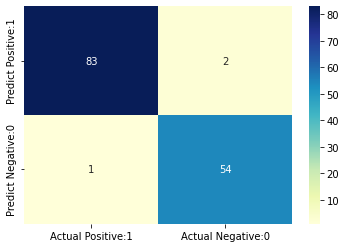

In [59]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **18. Метрики классификации** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)

### Classification Report

**Отчет о классификации** — это еще один способ оценить эффективность модели классификации. Он отображает оценки **precision**, **recall**, **f1** и **support** для модели. Я опишу эти термины позже.

Мы можем посмотреть отчет о классификации следующим образом:

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



### Classification accuracy

In [61]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [62]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9786


### Classification error

In [63]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0214


### Precision - Точность и recall - Полнота



Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

![](https://habrastorage.org/getpro/habr/post_images/164/93b/c89/16493bc899f7275f3b5ff8d45a3ed2e2.svg)

![](https://habrastorage.org/getpro/habr/post_images/258/4e7/8f3/2584e78f32225eade5cb8b1b4a665193.svg)

![](https://habrastorage.org/r/w1560/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png)


Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

In [64]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9765


In [65]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9881


### f1-score

F-мера - это средневзвешенное гармоническое precision и recall 

![](https://habrastorage.org/getpro/habr/post_images/4f1/f5c/0ab/4f1f5c0ab5dcf8379ff4bcbbd02f0623.svg)
**f1-оценка** всегда ниже, чем показатели точности, поскольку они включают точность и полноту в свои вычисления. 

### Support


**Support** — это фактическое количество вхождений класса в нашем наборе данных.

In [66]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



# **19. ROC-AUC** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)



### ROC Curve


Еще одним инструментом для визуального измерения производительности модели классификации является **ROC Curve**. **Кривая ROC** — это график, показывающий эффективность модели классификации.

**Кривая ROC** отображает **истинно положительные результаты (TPR)** в сравнении с **ложными положительными результатами (FPR)** при различных пороговых уровнях.


На кривой ROC мы сосредоточимся на TPR (истинно положительный показатель) и FPR (ложноположительный показатель) одной точки. Это даст нам общее качество кривой ROC, которая состоит из TPR и FPR на различных пороговых уровнях. Таким образом, кривая ROC отображает TPR в зависимости от FPR при разных пороговых уровнях классификации. Если мы снизим пороговые уровни, это может привести к тому, что больше элементов будут классифицированы как положительные. Это увеличит как истинные срабатывания (TP), так и ложные срабатывания (FP).


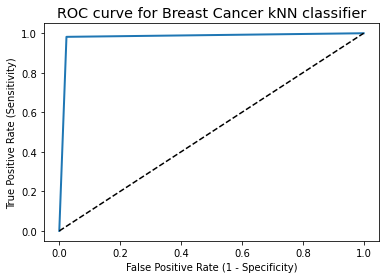

In [67]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_7, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


Кривая ROC помогает нам выбрать пороговый уровень, который уравновешивает чувствительность и специфичность для конкретного контекста.

### ROC  AUC


Таким образом, **ROC AUC** — это процент графика ROC, который находится под кривой.

In [68]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_7)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9791


### Интерпретация


- ROC AUC представляет собой сводку качества классификатора в виде одного числа. Чем выше значение, тем лучше классификатор.

- ROC AUC нашей модели приближается к 1. Таким образом, мы можем сделать вывод, что наш классификатор хорошо предсказывает, является ли рак доброкачественным или злокачественным.

In [69]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


### Интерпретация

Наш ROC AUC на кросс валидации очень близок к 1. Таким образом, мы можем сделать вывод, что классификатор KNN действительно является очень хорошей моделью.

[Наверх](#0)